In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as image

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
i = 0
for dirname, _, filenames in os.walk('data/train'):
    for filename in filenames:
        if '.png' in filename:
            #print(os.path.join(dirname, filename))
            i += 1
print(i)

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

1520


In [2]:
df_train =  pd.read_csv('data/train_labels.csv')
df_train

,filename,width,height,class,xmin,ymin,xmax,ymax
0,00000000a9764df2_20191005_085747_4.png,524,750,cappy_portakal,60,7,210,90
1,00000000a9764df2_20191005_085747_4.png,524,750,fuse_tea_seftali,217,1,396,78
2,00000000a9764df2_20191005_085747_4.png,524,750,johnnie_walker,390,1,439,155
3,00000000a9764df2_20191005_085747_4.png,524,750,miller,65,86,387,199
4,00000000a9764df2_20191005_085747_4.png,524,750,kinder_joy,438,83,503,193
...,...,...,...,...,...,...,...,...
11075,00000000a9764df2_20191003_163704_4.png,524,750,campari,383,26,452,176
11076,00000000a9764df2_20191003_163704_4.png,524,750,baileys,68,189,215,251
11077,00000000a9764df2_20191003_163704_4.png,524,750,kahlua,97,519,223,567
11078,00000000a9764df2_20191003_163704_4.png,524,750,beefeater,409,534,471,664


In [3]:
df_test =  pd.read_csv('data/test_labels.csv')
df_test

,filename,width,height,class,xmin,ymin,xmax,ymax
0,00000000a9764df2_20191005_030806_4.png,524,750,nescafe_xpress,57,7,225,88
1,00000000a9764df2_20191005_030806_4.png,524,750,burn,231,1,424,74
2,00000000a9764df2_20191005_030806_4.png,524,750,sprite,65,116,250,196
3,00000000a9764df2_20191005_030806_4.png,524,750,fanta,280,75,463,188
4,00000000a9764df2_20191005_030806_4.png,524,750,tadim_kavrulmus_badem,65,501,206,686
...,...,...,...,...,...,...,...,...
3995,00000000a9764df2_20191003_190301_4.png,524,750,efes_malt,60,320,452,441
3996,00000000a9764df2_20191003_190301_4.png,524,750,redbull_sugar_free,81,501,260,565
3997,00000000a9764df2_20191003_190301_4.png,524,750,efes_extra_shot,344,500,468,552
3998,00000000a9764df2_20191003_190301_4.png,524,750,pepsi,64,590,249,683


In [4]:
def decouple(df):
    matrix = {}
    classes = {}
    for index, row in df.iterrows():
        if row['filename'] not in matrix:
            matrix[row['filename']] = {'count':0}
        if row['class'] not in matrix[row['filename']]:
            matrix[row['filename']][row['class']] = 1
        else:
            matrix[row['filename']][row['class']] += 1
        matrix[row['filename']]['count'] += 1

        if row['class'] not in classes:
            classes[row['class']] = 1
        else:
            classes[row['class']] += 1
    #classes = {k: v for k, v in sorted(classes.items(), key=lambda item: item[1])}            
    return matrix,classes


In [5]:
matrix_train,classes_train = decouple(df_train)
matrix_test,classes_test = decouple(df_test)

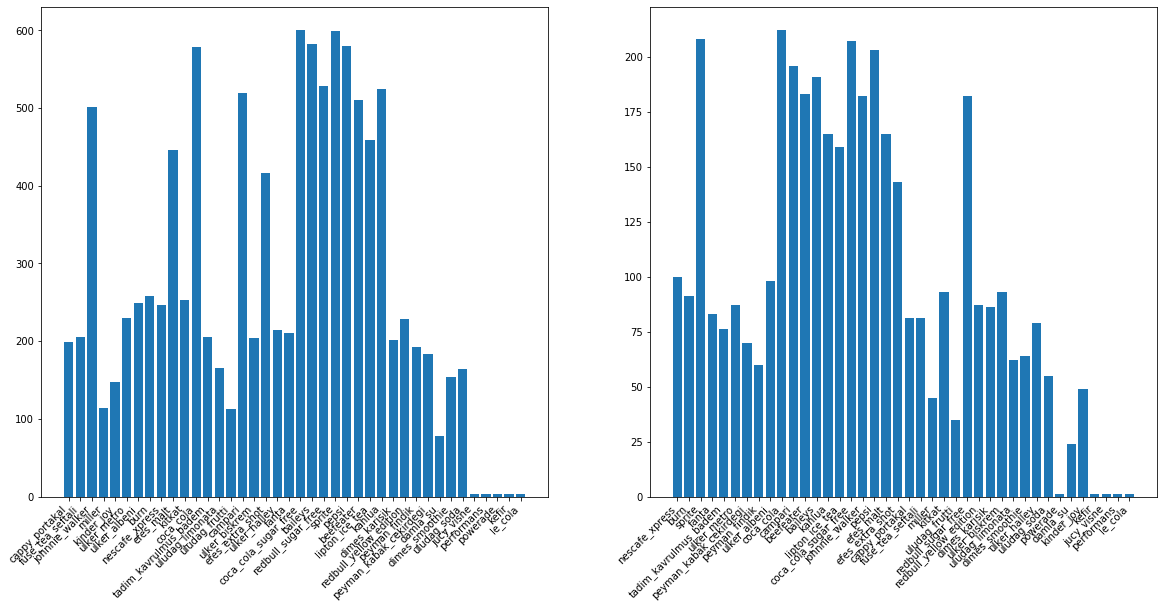

In [6]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].bar(list(classes_train.keys()), list(classes_train.values()))
ax[1].bar(list(classes_test.keys()), list(classes_test.values()))
fig.autofmt_xdate(rotation=45)
plt.show()

Every picture has multiple objects in them. Following section shows histogram of the count of objects that contains in each picture. For example first graph shows train list and most of the images has 1 objects in them. 

Notice that there is there is also considrable amount of images that has 13 objects marked in them.

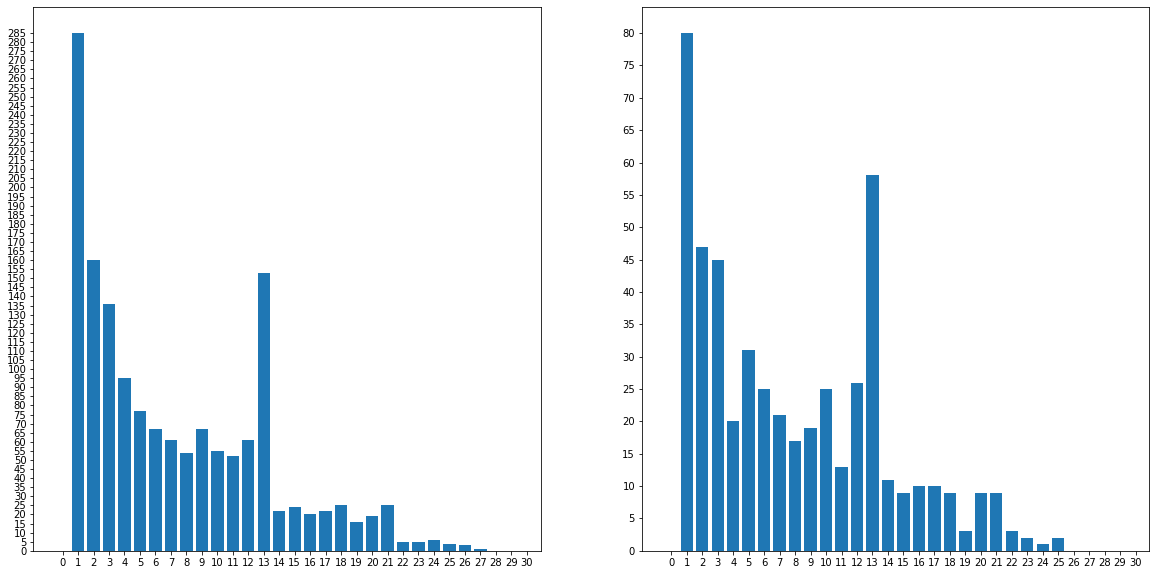

In [7]:
def count_histogram(matrix):
    count = np.zeros(30)
    for v in matrix.values():
        count[v['count']] += 1
    return count.tolist()

fig, ax = plt.subplots(1,2,figsize=(20,10))

c_train = count_histogram(matrix_train)
ax[0].bar(range(len(c_train)),c_train)
ax[0].xaxis.set_ticks(np.arange(0, len(c_train)+1, 1.0))
ax[0].yaxis.set_ticks(np.arange(0, max(c_train)+1, 5.0))

c_test = count_histogram(matrix_test)
ax[1].bar(range(len(c_test)),c_test)
ax[1].xaxis.set_ticks(np.arange(0, len(c_test)+1, 1.0))
ax[1].yaxis.set_ticks(np.arange(0, max(c_test)+1, 5.0))

plt.show()

some example images that contains 13 objects.

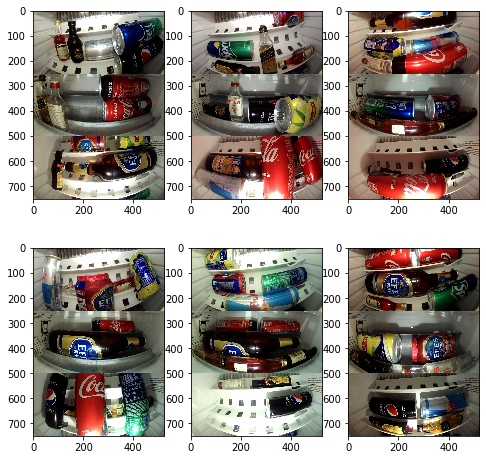

In [9]:
smaple_images = []
for fname,v in matrix_train.items():
    if v['count'] == 13:
        smaple_images.append(fname)
    if(len(smaple_images) >= 6):
        break
   
fig=plt.figure(figsize=(8, 8))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img = image.imread('data/train/'+smaple_images[i-1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()    